Dataset Shape: (250, 11)

Columns: ['Order ID', 'Date', 'Product', 'Category', 'Price', 'Quantity', 'Total Sales', 'Customer Name', 'Customer Location', 'Payment Method', 'Status']

Preview:
   Order ID       Date        Product     Category  Price  Quantity  \
0  ORD0001   14-03-25  Running Shoes     Footwear     60         3   
1  ORD0002   20-03-25     Headphones  Electronics    100         4   
2  ORD0003   15-02-25  Running Shoes     Footwear     60         2   
3  ORD0004   19-02-25  Running Shoes     Footwear     60         3   
4  ORD0005  10/3/2025     Smartwatch  Electronics    150         3   

   Total Sales  Customer Name Customer Location Payment Method     Status  
0          180     Emma Clark          New York     Debit Card  Cancelled  
1          400  Emily Johnson     San Francisco     Debit Card    Pending  
2          120       John Doe            Denver     Amazon Pay  Cancelled  
3          180  Olivia Wilson            Dallas    Credit Card    Pending  
4      

/tmp/ipython-input-2342182036.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
/tmp/ipython-input-2342182036.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Total Sales', estimator=sum, ci=None, palette='crest')
/tmp/ipython-input-2342182036.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Category', y='Total Sales', estimator=sum, ci=None, palette='crest')


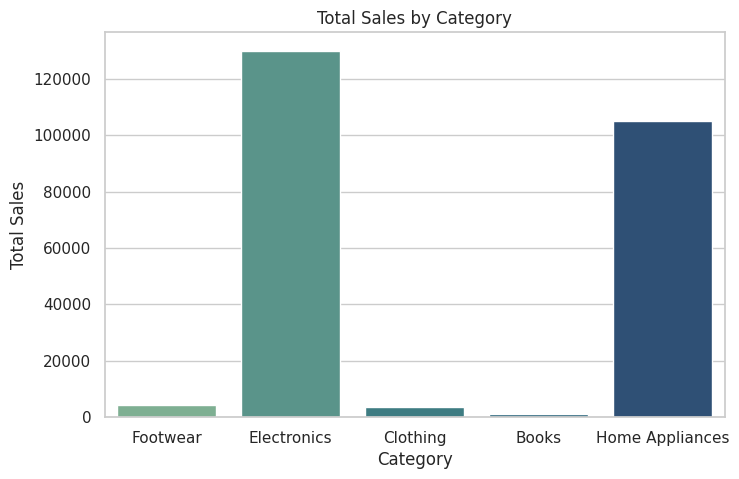

/tmp/ipython-input-2342182036.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Quantity', estimator=sum, ci=None, palette='flare')
/tmp/ipython-input-2342182036.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Category', y='Quantity', estimator=sum, ci=None, palette='flare')


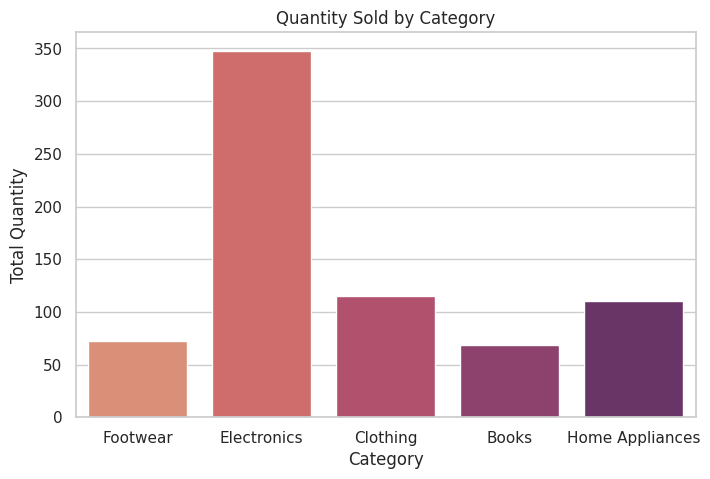

/tmp/ipython-input-2342182036.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


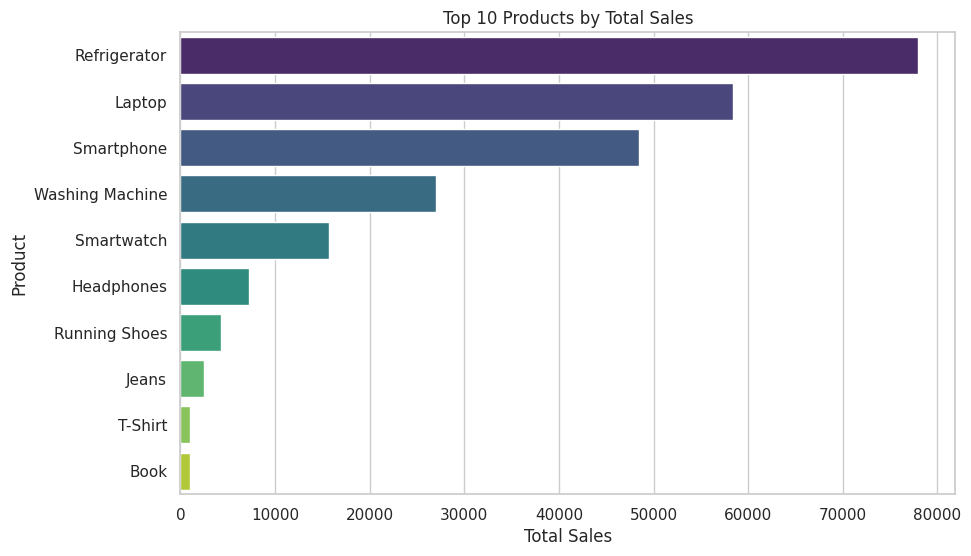

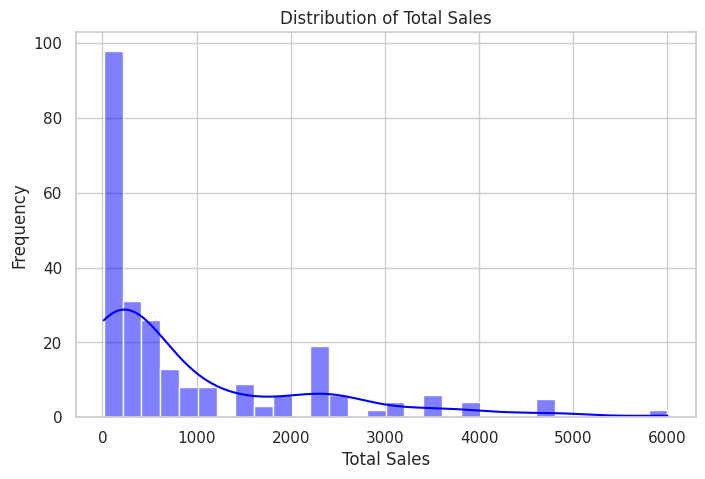

/tmp/ipython-input-2342182036.py:72: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Payment Method', y='Total Sales', estimator=sum, ci=None, palette='magma')
/tmp/ipython-input-2342182036.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Payment Method', y='Total Sales', estimator=sum, ci=None, palette='magma')


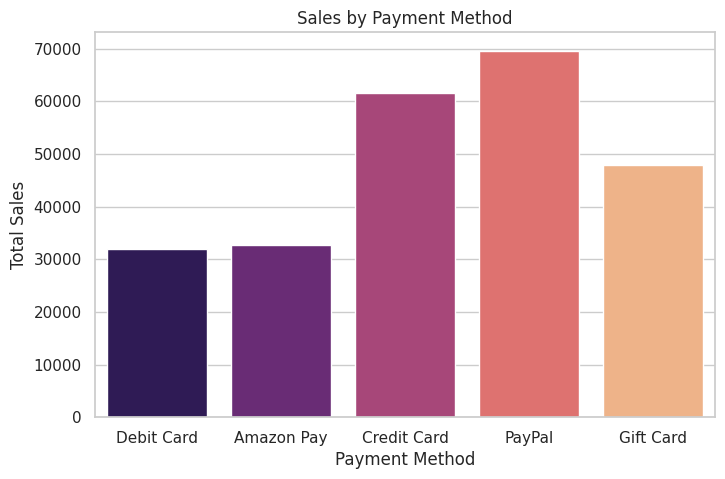

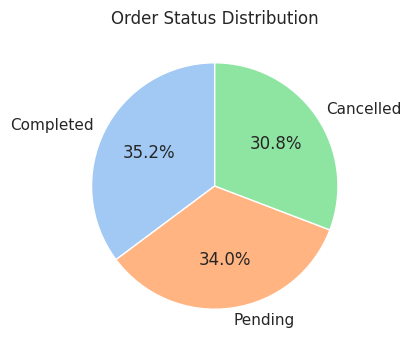

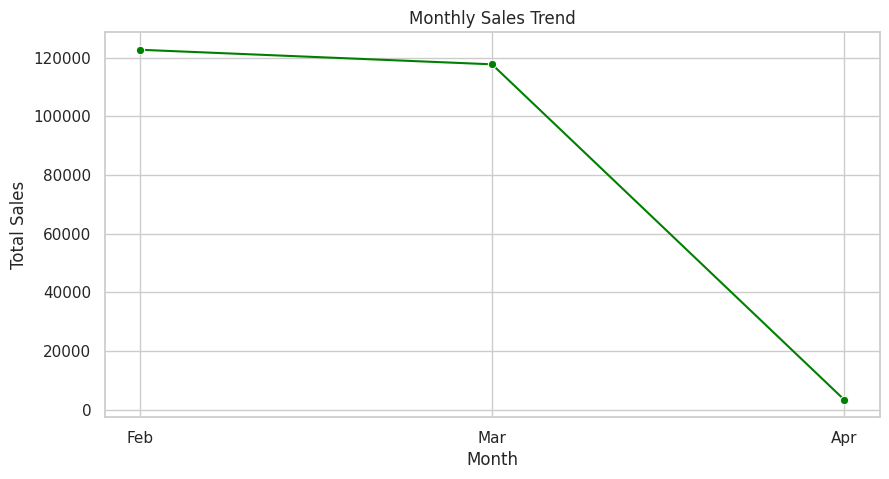

✅ Visualization Completed Successfully!
Most profitable categories and top products can be identified above.
Consider combining this analysis with profit or customer loyalty data for deeper insights.


In [7]:
# ===============================================
# 📦 Amazon Sales 2025 Visualization Dashboard
# ===============================================

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("amazon_sales.csv")

# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nPreview:\n", df.head())

# Set style
sns.set(style="whitegrid", palette="pastel")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Extract Month for trend analysis
df['Month'] = df['Date'].dt.strftime('%b')

# -----------------------------------------------
# 1️⃣ Total Sales by Category
# -----------------------------------------------
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Category', y='Total Sales', estimator=sum, ci=None, palette='crest')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

# -----------------------------------------------
# 2️⃣ Quantity Sold by Category
# -----------------------------------------------
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Category', y='Quantity', estimator=sum, ci=None, palette='flare')
plt.title('Quantity Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity')
plt.show()

# -----------------------------------------------
# 3️⃣ Top 10 Products by Total Sales
# -----------------------------------------------
top_products = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

# -----------------------------------------------
# 4️⃣ Distribution of Total Sales
# -----------------------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df['Total Sales'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

# -----------------------------------------------
# 5️⃣ Sales by Payment Method
# -----------------------------------------------
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Payment Method', y='Total Sales', estimator=sum, ci=None, palette='magma')
plt.title('Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()

# -----------------------------------------------
# 6️⃣ Order Status Breakdown
# -----------------------------------------------
plt.figure(figsize=(6,4))
status_counts = df['Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Order Status Distribution')
plt.show()

# -----------------------------------------------
# 7️⃣ Monthly Sales Trend
# -----------------------------------------------
monthly_sales = df.groupby('Month')['Total Sales'].sum().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# -----------------------------------------------
# ✅ Summary
# -----------------------------------------------
print("✅ Visualization Completed Successfully!")
print("Most profitable categories and top products can be identified above.")
print("Consider combining this analysis with profit or customer loyalty data for deeper insights.")


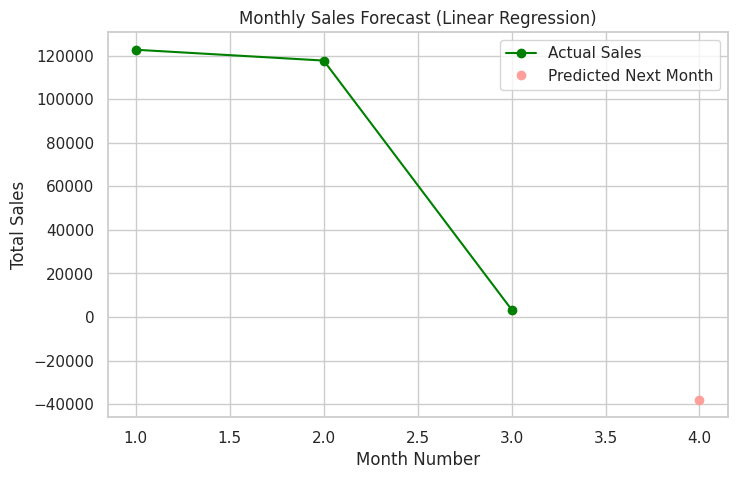

📈 Predicted Total Sales for Next Month: -37,993.33


In [9]:
# ===============================================
# 🤖 Predicting Next Month's Sales
# ===============================================

from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data
monthly_sales = (
    df.groupby('Month')['Total Sales']
    .sum()
    .reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    .dropna()
)

# Create numeric month values for regression
month_numbers = np.arange(1, len(monthly_sales)+1).reshape(-1, 1)
sales_values = monthly_sales.values

# Train model
model = LinearRegression()
model.fit(month_numbers, sales_values)

# Predict next month
next_month = np.array([[len(monthly_sales) + 1]])
predicted_sales = model.predict(next_month)[0]

# Visualize prediction
plt.figure(figsize=(8,5))
plt.plot(month_numbers, sales_values, marker='o', label='Actual Sales', color='green')
plt.plot(next_month, predicted_sales, 'ro', label='Predicted Next Month')
plt.title('Monthly Sales Forecast (Linear Regression)')
plt.xlabel('Month Number')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

print(f"📈 Predicted Total Sales for Next Month: {predicted_sales:,.2f}")


📊 Model Performance Metrics:
Mean Absolute Error (MAE): 109345.00
Mean Squared Error (MSE): 11956329025.00
R² Score: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


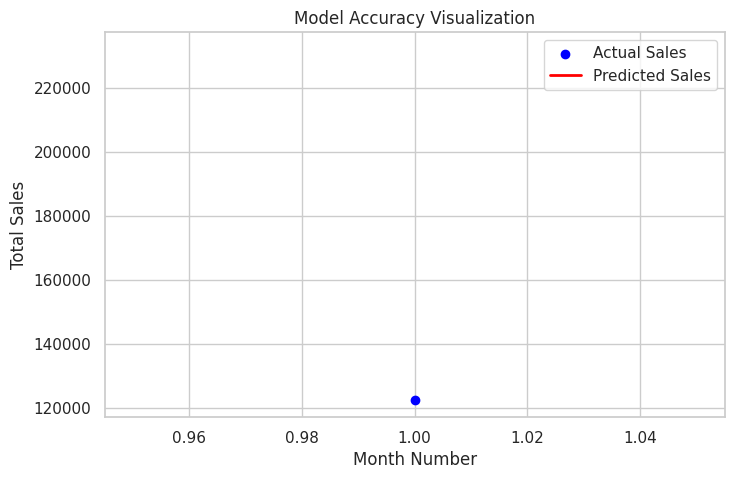

In [12]:
# ===============================================
# 📏 Model Evaluation (Train-Test Split)
# ===============================================
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(month_numbers, sales_values, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualization
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Sales')
plt.title('Model Accuracy Visualization')
plt.xlabel('Month Number')
plt.ylabel('Total Sales')
plt.legend()
plt.show()
